# Diagrama de Forças

Vamos criar o diagrama de forças para um sistema em vibração forçada amortecida, sujeito a excitação harmônica.

## Setup

In [118]:
from math import sqrt, sin, cos, pi
import cmath
import matplotlib.pyplot as plt

##  Sistema mecânico

In [119]:
m = 1
c = 2.4
k = 40

In [120]:
ωn = sqrt(k/m)
cc = 2*m*ωn
ζ = c/cc
print(f'Frequência natural: {ωn:.3f}, Razão de amortecimento: {ζ:.3f}.')

Frequência natural: 6.325, Razão de amortecimento: 0.190.


## Resposta
Supondo que a força seja dada por $F(t) = F_0 e^{i\omega t}$ equação de movimento para este problema ẽ
$$ m \ddot x + c \dot x + k x = F_0 e^{i\omega t}.$$
Supondo que a resposta seja dada po $x(t) = Xe^{i\omega t}$, temos que  $\dot x(t) = i\omega Xe^{i\omega t}$ e $\ddot x(t) = -\omega^2 e^{i\omega t}$, onde $X$ é um número complexo, ficamos com
$$ -\omega^2X e^{i\omega t} m  + i\omega Xe^{i\omega t} c + Xe^{i\omega t} k = F_0 e^{i\omega} t,$$
ou
$$ \left[-\omega^2 m  + i\omega c +  k\right]Xe^{i\omega t} = F_0 e^{i\omega} t,$$
$$ \left[-\omega^2 m  + i\omega c +  k\right]X  = F_0 ,$$
e finalmente,
$$ X = \frac{F_0}{ k-\omega^2 m  + i\omega c } = \frac{\delta_\text{st}}{1 - r^2 + 2\zeta r i}.$$

Perceba que $X$ é um número complexo, com amplitude e fase!

## Forças
Se o deslocamento é $Xe^{i\omega t}$, a velocidade é $i \omega Xe^{i\omega t}$ e a aceleração é $ -\omega^2 Xe^{i\omega t}$.

Sabemos também que a força elástica é $F_e = kx(t)$, a força de amortecimento é $F_a = c \dot x(t)$ e a força de inércia é $F_i = m \ddot x(t)$. Claramente, cada força é um fasor alinhado com a grandeza cinemática correspondente, e giram todas com a mesma velocidade.

Temos então
$$ F_e = kX e^{i\omega t}, \quad F_a = i \omega c X e^{i\omega t}, \quad F_i = -m \omega^2  X e^{i\omega t}.$$

Como sempre, a velocidade está adiantada de $\pi/2$ radianos em relação ao deslocamento e a aceleração adiantada de $\pi/2$ radianos em relação à velocidade.

Como a massa encontra-se em equilíbrio dinâmico, o somatório das forças que agem sobre ela, incluindo a força de inércia, deve ser nulo, e portanto a representação gráfica deste somatório é um polígono fechado. 

Como todos os fasores giram com a mesma velocidade, podemos ignorar o termo $ e^{i\omega t}$ e  plotar apenas as magnitudes e as direções relativas das forças.

### Diagrama

Precisamos calcular a reposta para calcular a magnitude das forças.

In [121]:
F0 = 10
ω = 4

δ = F0/k
ωn = sqrt(k/m)
r = ω/ωn
cc = 2*m*ωn
ζ = c/cc

print(f'ωn:{ωn:.4f}, ζ:{ζ:.4g}, r:{r:.4g}, δ:{δ:.4g}')

ωn:6.3246, ζ:0.1897, r:0.6325, δ:0.25


In [122]:
X = δ/(1 - r**2 + 2*ζ*r*1j)
print(f'X: {X}')

X: (0.3591954022988506-0.14367816091954025j)


In [123]:
Fe = k*X
Fa = 1j*ω*c*X
Fi = -m*ω**2*X
print(f'Fe: {Fe:.4}')
print(f'Fa: {Fa:.4}')
print(f'Fi: {Fi:.4}')

Fe: (14.37-5.747j)
Fa: (1.379+3.448j)
Fi: (-5.747+2.299j)


### Verificação

Só para conforto espiritual,

In [124]:
R = -F0 + Fe + Fa + Fi
print(f'R: {R:.4}')

R: (8.882e-16+0j)


A resultante não é nula devido à imprecisão da aritimética de ponto flutuante do computador.

## Representação Gráfica

Vamos rotacionar a força externa $F_0$  simplesmente para a figura ficar mais bonitinha, consequentemente, temos que rotacionar todas as outras forças do mesmo ângulo.

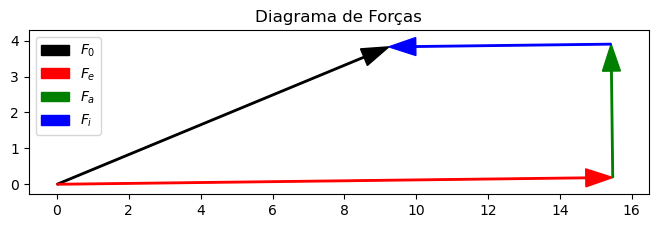

In [125]:
α = pi/8
F0r = F0*cmath.exp(1j*α)
Fer = Fe*cmath.exp(1j*α)
Far = Fa*cmath.exp(1j*α)
Fir = Fi*cmath.exp(1j*α)
                
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_title('Diagrama de Forças')
ax.set_aspect('equal')
f0 = ax.arrow(0, 0, F0r.real, F0r.imag, width=0.04, head_width=0.5, color='black',
        length_includes_head=True)
fe = ax.arrow(0, 0, Fer.real, Fer.imag, width=0.04, head_width=0.5, color='red',
         length_includes_head=True)
fa = ax.arrow(Fer.real, Fer.imag, Far.real, Far.imag, width=0.04, head_width=0.5, color='green',
         length_includes_head=True)
fi = ax.arrow(Far.real+Fer.real, Far.imag+Fer.imag, Fir.real, Fir.imag, width=0.04, head_width=0.5, color='blue',
         length_includes_head=True, )
f0.set_label(r'$F_0$')
fe.set_label(r'$F_e$')
fa.set_label(r'$F_a$')
fi.set_label(r'$F_i$')
_ = ax.legend()